**IMPORTS**: Importing all the necessary packages that will be used

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from joblib import dump

Importing the dataframe

In [70]:
data = pd.read_csv('data/admission_data.csv')
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,Recommendation,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Renaming**: Renaming some complex datasets titles

In [71]:
data.rename(columns = {'SOP': 'Essay rating'}, inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,Essay rating,Recommendation,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   Essay rating       500 non-null    float64
 4   Recommendation     500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**Graphs**: Plotting the dataframe on some important graphs to illustrate different 
relationships

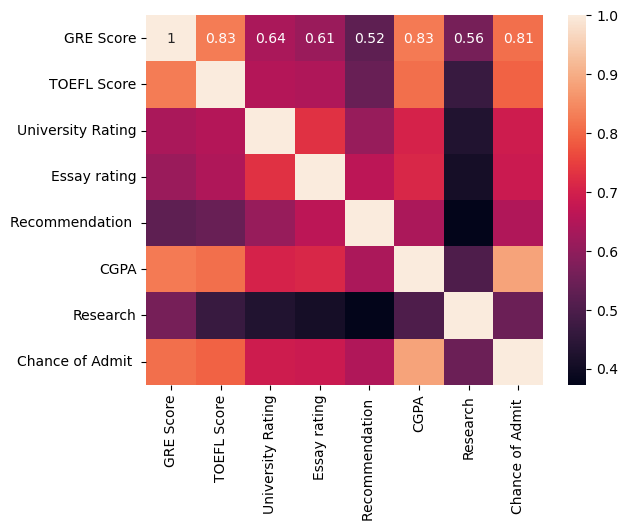

In [73]:
correlations = data.corr()
sns.heatmap(correlations, annot=True)
plt.show()

**Model Creation and Data selection**

Choose the axes, test data and more

In [74]:
X = data.drop(columns = ['Chance of Admit '])
y = data['Chance of Admit ']

Scale the X data and designate the training and testing portion

In [75]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

Perform linear regression model training

In [76]:
linR_model = LinearRegression()
linR_model.fit(X_train, y_train)

LinearRegression()

Evaluated model using mean absolute error and root mean squared error

In [77]:
y_pred = linR_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error: ", mae)
rsme = np.sqrt(mae)
print("root mean squared error: ", rsme)

mean absolute error:  0.042722654277053664
root mean squared error:  0.20669459179440003


Evaluate the model's score using model.scroe

In [78]:
model_score = linR_model.score(X_test, y_test) * 100
print("The model's score percentage is: ", model_score)

The model's score percentage is:  81.88432567829628


**Graphs:** We can use various graphs to illustrate the similarities between predicted values and the actual values

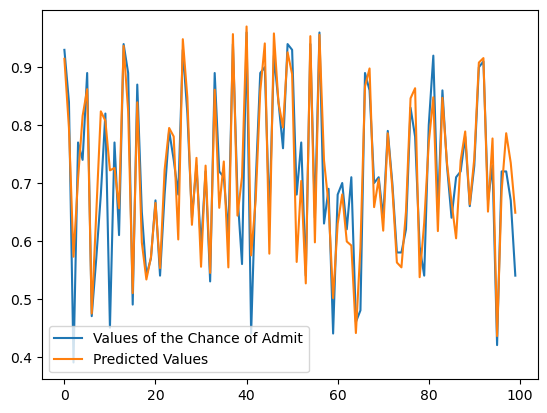

In [79]:
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label='Values of the Chance of Admit')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

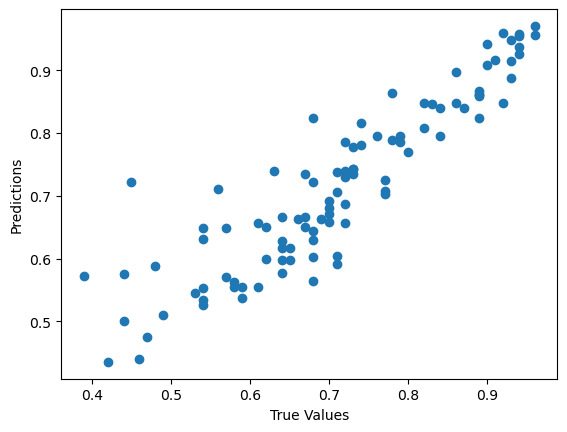

In [80]:
plt.scatter(y_test_values, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

**Exporting**: Saving and exporting our final model to be used in creating an API

In [83]:
# final look at x and y values
print("The columns(arguments):", X.columns)
print("The y value we are predicting is:", y.name)

The columns(arguments): Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Essay rating',
       'Recommendation ', 'CGPA', 'Research'],
      dtype='object')
The y value we are predicting is: Chance of Admit 


Saving the model

In [87]:
dump(linR_model, '../API/multivariate_model.joblib')

['../API/multivariate_model.joblib']

Saving the scaler

In [88]:
dump(scaler, '../API/multivariate_scaler.joblib')

['../API/multivariate_scaler.joblib']